In [2]:
import pandas as pd

In [2]:
teams = pd.read_html('http://clubelo.com/Ranking')
teams

[                             0                           1   2
 0                      Ranking                     Ranking NaN
 1             Coaches (active)            Coaches (active) NaN
 2   Games (Results - Fixtures)  Games (Results - Fixtures) NaN
 3                       Europe                      Europe NaN
 4               UCL (16 teams)                       ⌀1861 NaN
 ..                         ...                         ...  ..
 88                       Wales                       Wales NaN
 89                  Montenegro                  Montenegro NaN
 90                   Gibraltar                   Gibraltar NaN
 91                     Andorra                     Andorra NaN
 92                  San Marino                  San Marino NaN
 
 [93 rows x 3 columns],
      Rank                   Club   Elo Unnamed: 3  Last Match  Coach
 0       1             1 Man City  2051        NaN  2024-02-05    NaN
 1       2          2 Real Madrid  1972        NaN  2024-02-04    

In [3]:
leagues = teams[0]
teams = teams[1]

In [5]:
import requests
from bs4 import BeautifulSoup

In [6]:
link = 'http://clubelo.com/Ranking'
page = requests.get(link)
soup = BeautifulSoup(page.text, 'lxml')
tables = soup.find_all('table')

In [12]:
tables[1].find_all('img')[0]['alt']

'ENG'

In [15]:
countries = [img['alt'] for img in tables[1].find_all('img')]
len(countries)

631

In [ ]:
teams['Country'] = countries

In [18]:
teams[['Club','Elo','Country']].to_csv('teams_data.csv', index=False)

In [11]:
teams_data = pd.read_csv('teams_data.csv')

In [12]:
countries = teams_data['Country'].unique()

In [13]:
countries

array(['ENG', 'ESP', 'GER', 'ITA', 'FRA', 'NED', 'POR', 'BEL', 'TUR',
       'CZE', 'AUT', 'RUS', 'SCO', 'DEN', 'UKR', 'SUI', 'NOR', 'ISR',
       'GRE', 'AZE', 'POL', 'SRB', 'BUL', 'CRO', 'CYP', 'HUN', 'ROM',
       'MOL', 'SWE', 'SVN', 'SLK', 'KAZ', 'LIE', 'FIN', 'BHZ', 'LAT',
       'ARM', 'BLR', 'ISL', 'MAC', 'LIT', 'KOS', 'ALB', 'GEO', 'IRL',
       'FAR', 'MLT', 'EST', 'NIR', 'LUX', 'WAL', 'MNT', 'GIB', 'AND',
       'SMR'], dtype=object)

In [ ]:
german_teams = pd.read_html('http://www.elofootball.com/country.php?countryiso=GER&season=2023-2024')

In [15]:
from time import sleep

In [23]:
# teams_by_country = []
# successes = []
# fails = []

for country in fails_sub:
    sleep(5)
    link = f'http://www.elofootball.com/country.php?countryiso={country}&season=2023-2024'
    try:
        teams = pd.read_html(link)[2][['Club','Rating']]
        teams_by_country.append(teams)
        successes.append(country)
        print(country, 'in database')
    except:
        fails.append(country)
        print(country, 'failed')

DEU in database
NLD in database
PRT in database
DNK in database
CHE in database
GRC in database
BGR in database
HRV in database
ROU in database
MDA in database
SVK in database
BIH in database
LVA in database
MKD in database
LTU in database
FRO in database
WLS in database
MNE in database


In [17]:
fails_sub = ['DEU','NLD','PRT','DNK','CHE','GRC','BGR','HRV','ROU','MDA','SVK','BIH','LVA','MKD','LTU','FRO','WLS','MNE']
#btw why the hell is swiss che
#liechtenstein is not in the database, the acrual teams are in the swiss league system

In [18]:
successes = []
for country in countries:
    if country not in fails:
        successes.append(country)

In [36]:
for table in teams_by_country:
    print(len(table))

125
66
45
77
43
47
40
41
45
20
56
25
13
54
28
22
30
44
22
17
40
14
18
33
13
25
20
20
17
13
22
34
11
12
16
168
64
56
45
33
55
29
17
25
13
20
27
11
20
12
15
28
17


In [ ]:
manual_approach = ['RUS']

In [47]:
successes[39] = 'SUI'

In [48]:
teams_by_country2 = []
for table, country in zip(teams_by_country, successes):
    country_col = [country] * len(table)
    table['Country'] = country_col
    table = table.rename(columns = {'Rating': 'Elo'})
    teams_by_country2.append(table)

In [49]:
teams_data2 = pd.concat(teams_by_country2).sort_values('Elo', ascending = False).reset_index(drop = True)
teams_data2

,Club,Elo,Country
0,Manchester City,2386,ENG
1,Real Madrid,2335,ESP
2,Inter,2314,ITA
3,Liverpool FC,2266,ENG
4,Arsenal FC,2232,ENG
...,...,...,...
1818,College 1975 FC,496,GIB
1819,CF Atlètic Amèrica,482,AND
1820,San Marino Academy,401,SMR
1821,SS Pennarossa,376,SMR


In [93]:
teams_data2[teams_data2.Country == 'DEU']

,Club,Elo,Country
5,Bayer Leverkusen,2222,DEU
6,Bayern München,2221,DEU
9,Borussia Dortmund,2159,DEU
12,RB Leipzig,2142,DEU
29,VfB Stuttgart,2059,DEU
...,...,...,...
1691,FC Oberneuland,989,DEU
1693,SV Schalding-Heining,983,DEU
1704,SV Heimstetten,973,DEU
1716,FC Memmingen,959,DEU


In [50]:
teams_data2.to_csv('teams_data2.csv', index = False)

In [51]:
country_elo = {}
country_teams = {}

for table in teams_by_country2:
    top_teams = table[:10]
    country = table['Country'][0]
    mean = top_teams['Elo'].mean()
    country_elo[country] = mean
    country_teams[country] = len(table)
 

In [53]:
country_data = pd.DataFrame({'Elo': country_elo, 'Teams': country_teams}).sort_values('Elo', ascending = False)
country_data

,Elo,Teams
ENG,2144.6,125
ESP,2095.0,66
ITA,2081.9,45
DEU,2055.6,168
FRA,2003.5,77
PRT,1890.7,56
BEL,1859.4,43
NLD,1844.7,64
CZE,1814.8,40
TUR,1807.1,47


In [72]:
allocation = [10]*5 + [6]*10 + [4]*15 + [2] * 23

In [73]:
country_data['Allocation'] = allocation

In [75]:
country_data.Allocation.to_dict()

{'ENG': 10,
 'ESP': 10,
 'ITA': 10,
 'DEU': 10,
 'FRA': 10,
 'PRT': 6,
 'BEL': 6,
 'NLD': 6,
 'CZE': 6,
 'TUR': 6,
 'GRC': 6,
 'DNK': 6,
 'SUI': 6,
 'NOR': 6,
 'AUT': 6,
 'SWE': 4,
 'POL': 4,
 'ROU': 4,
 'UKR': 4,
 'HUN': 4,
 'BGR': 4,
 'SCO': 4,
 'HRV': 4,
 'ISR': 4,
 'SRB': 4,
 'SVK': 4,
 'CYP': 4,
 'SVN': 4,
 'BLR': 4,
 'FIN': 4,
 'BIH': 2,
 'AZE': 2,
 'KAZ': 2,
 'IRL': 2,
 'ISL': 2,
 'GEO': 2,
 'MKD': 2,
 'ALB': 2,
 'NIR': 2,
 'MDA': 2,
 'LUX': 2,
 'MNE': 2,
 'KOS': 2,
 'ARM': 2,
 'MLT': 2,
 'LTU': 2,
 'LVA': 2,
 'WLS': 2,
 'FRO': 2,
 'EST': 2,
 'GIB': 2,
 'AND': 2,
 'SMR': 2}

In [76]:
country_data.to_csv('country_data.csv')

<Axes: >

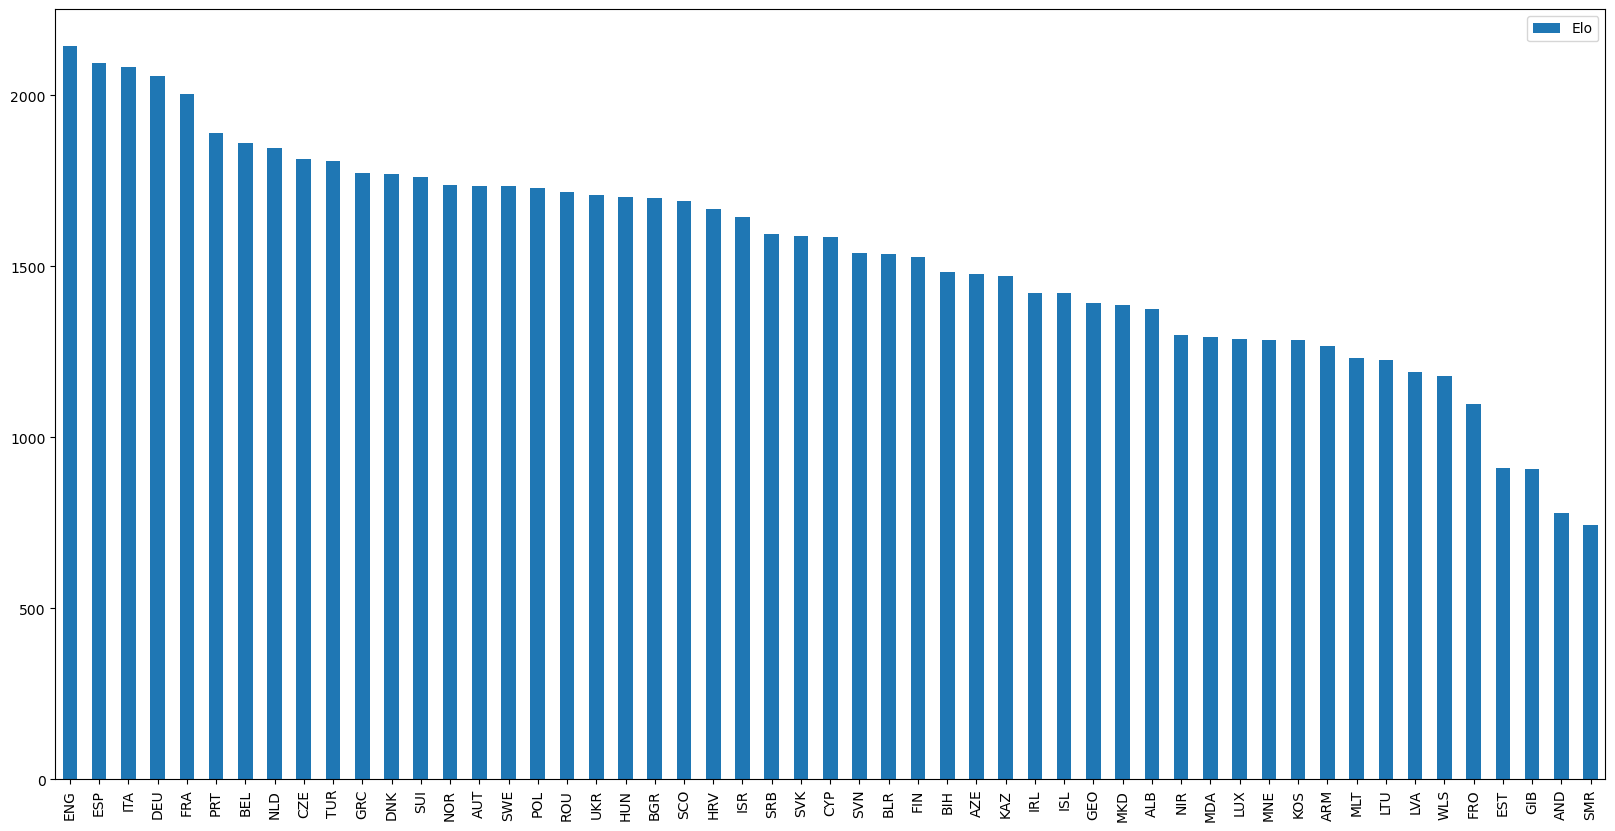

In [63]:
country_data.plot.bar(y = 'Elo', figsize = (20,10))

In [85]:
[i for i,x in country_data.Allocation if x == 6]

TypeError: cannot unpack non-iterable int object

In [89]:
country_data.Allocation['PRT']

6

In [91]:
allocation.count(5)

0